In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

/opt/anaconda3/envs/python_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.job_posted_date = pd.to_datetime(df['job_posted_date'])

In [3]:
df.job_skills = df.job_skills.apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [4]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


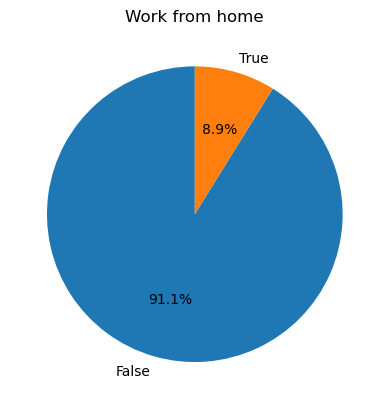

In [12]:
df.job_work_from_home.value_counts().plot(kind='pie',startangle=90, autopct='%1.1f%%')
plt.title('Work from home')
plt.ylabel('')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [15]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


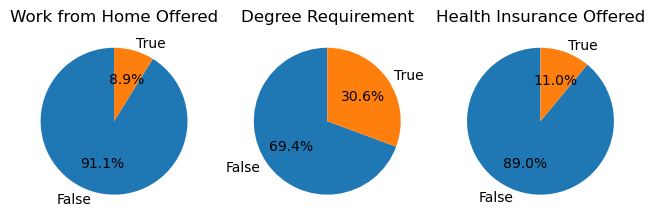

In [40]:
fig, ax = plt.subplots(1,3)
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column,title) in enumerate(dict_column.items()):
  ax[i].pie(df[column].value_counts(), labels=['False', 'True'], startangle=90, autopct='%1.1f%%')
  ax[i].set_title(title)
  #i valori in labels devono essere in ordine preciso
fig.tight_layout()